In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder  ##. better to use dummy from pandas 
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
from scipy.stats import zscore
import math

# Import Data

In [2]:
# train = pd.read_csv("/Users/irenewalken/Documents/GitHub/Airline-Passenger-Satisfaction-Machine_learning-/Data/train.csv")
# test = pd.read_csv("/Users/irenewalken/Documents/GitHub/Airline-Passenger-Satisfaction-Machine_learning-/Data/test.csv")

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
data = pd.concat([train, test])
data

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,25971,78463,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,25972,71167,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,satisfied
25973,25973,37675,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,25974,90086,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,satisfied


# Data cleaning

**Drop unused columns**

In [3]:
data = data.drop(["Unnamed: 0"], axis = 1)
data = data.drop(["id"], axis = 1)
data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,satisfied
25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
25974,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,satisfied


**Check the data types**

In [4]:
data.dtypes

Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
satisfacti

**Check if we have NaN values**

In [5]:
data.isnull().sum().sum()

393

In [6]:
data.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [7]:
data.shape

(129880, 23)

**>>>>>We have 393 rows with Nan value and as Nan value is less than 1% of data, the better way is drop this rows, but then when we start the EDA and check corralation between columns, we can see that "Departure Delay in Minutes" and "Arrival Delay in Minutes" have extremely hight corralation, so we will need to drop one of column. Evensually I droped "Arrival Delay in Minutes" without dropping rows with Nan vulue<<<<<**


In [ ]:
#data = data.dropna() - if we wanna drop rows with the nan value

# EDA 

In [8]:
data_numerical = data.select_dtypes(include=np.number, exclude=np.object)#get numerical data



## Correlation map

**Make a heat map for seeing the correlation between columns**

We can see that Arrival Delay in Minutes and Departure Delay in Minutes have very strong correlation, so we need to drop one of them

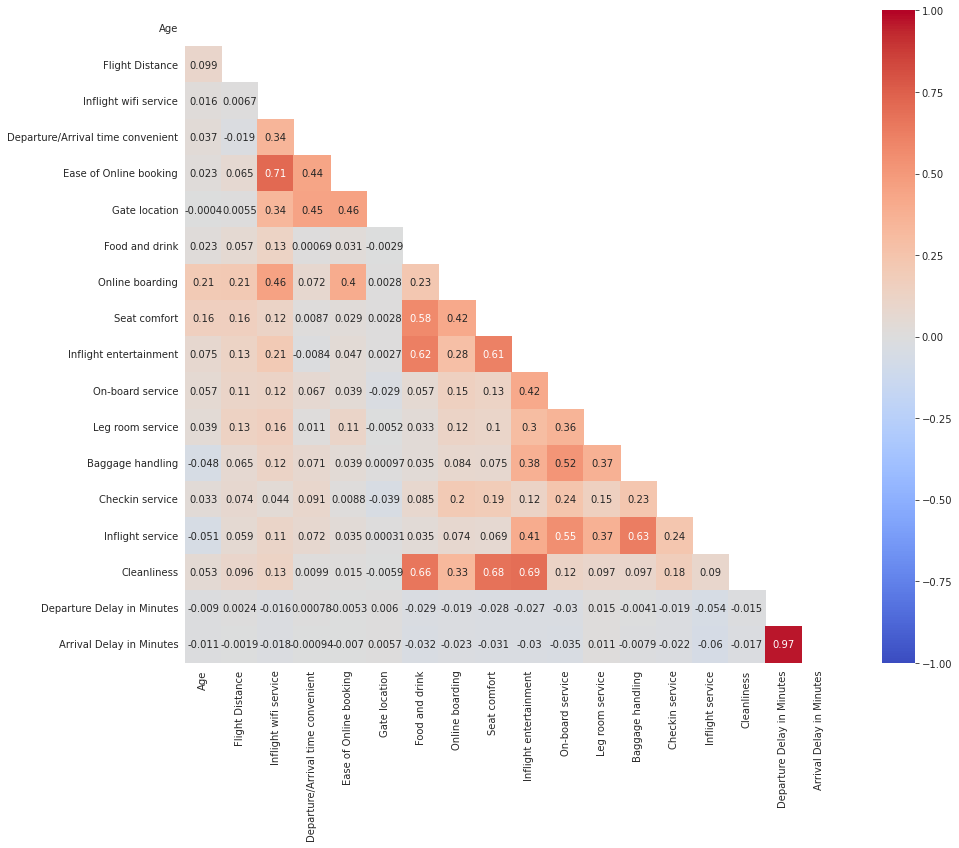

In [9]:
corr = data_numerical.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 12))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [10]:
data = data.drop(["Arrival Delay in Minutes"],axis = 1)
data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,neutral or dissatisfied
25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,satisfied
25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,neutral or dissatisfied
25974,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,satisfied


## Remove the outliers

In [11]:
data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713
std,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000
50%,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000
75%,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000


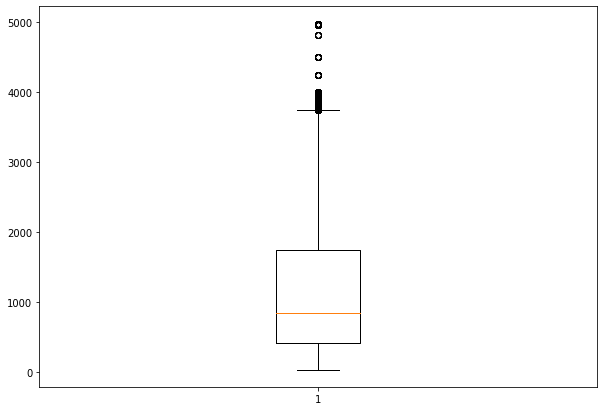

In [12]:
import matplotlib.pyplot as plt
import numpy as np
 
fig = plt.figure(figsize =(10, 7))

plt.boxplot(data["Flight Distance"])

plt.show()

In [13]:
Q1 = np.percentile(data["Flight Distance"], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data["Flight Distance"], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

# Upper bound
upper = np.where(data["Flight Distance"] >= (Q3+1.5*IQR))
print(upper)

# Lower bound
lower = np.where(data["Flight Distance"] <= (Q1-1.5*IQR))
print(lower)

(array([    80,    173,    201, ..., 129778, 129795, 129843]),)
(array([], dtype=int64),)


In [14]:
data = data[data["Flight Distance"]< Q3+1.5*IQR]   # delete Upper bound outliers (we don't have lower bound, so we will delete just upper bound)
data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,neutral or dissatisfied
25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,satisfied
25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,neutral or dissatisfied
25974,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,satisfied


In [15]:
data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
count,127016.000000,127016.000000,127016.000000,127016.000000,127016.000000,127016.000000,127016.000000,127016.000000,127016.000000,127016.000000,127016.000000,127016.000000,127016.000000,127016.000000,127016.000000,127016.000000,127016.000000
mean,39.337068,1129.452219,2.728609,3.060756,2.753551,2.976830,3.201392,3.238623,3.431229,3.348830,3.376244,3.342563,3.628661,3.302395,3.639116,3.280453,14.692338
std,15.169340,921.297275,1.326737,1.527612,1.399311,1.275784,1.331354,1.352580,1.322307,1.336515,1.288287,1.317668,1.180613,1.267219,1.177442,1.315623,38.031117
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,408.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000
50%,40.000000,814.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000
75%,51.000000,1660.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000
max,85.000000,3738.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000


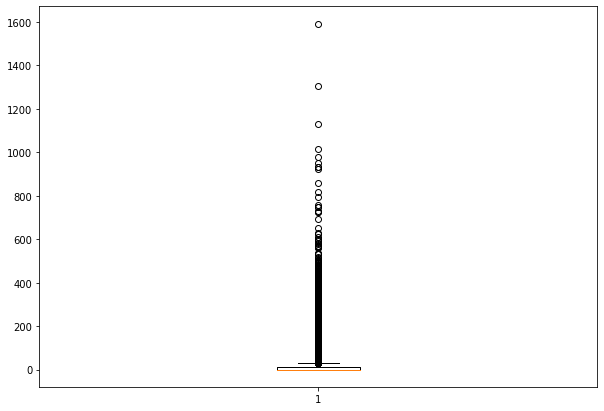

In [16]:
import matplotlib.pyplot as plt
import numpy as np
 
fig = plt.figure(figsize =(10, 7))

plt.boxplot(data["Departure Delay in Minutes"])

plt.show()

In [17]:
Q1 = np.percentile(data["Departure Delay in Minutes"], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(data["Departure Delay in Minutes"], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

# Upper bound
upper = np.where(data["Departure Delay in Minutes"] >= (Q3+1.5*IQR))
print(upper)

# Lower bound
lower = np.where(data["Departure Delay in Minutes"] <= (Q1-1.5*IQR))
print(lower)


(array([    14,     16,     22, ..., 126982, 126990, 127004]),)
(array([], dtype=int64),)


In [18]:
data = data[data["Departure Delay in Minutes"]< Q3+1.5*IQR]   # delete Upper bound outliers (we don't have lower bound, so we will delete just upper bound)
data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,neutral or dissatisfied
25972,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,satisfied
25973,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,neutral or dissatisfied
25974,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,satisfied


In [19]:
data.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes
count,108814.000000,108814.000000,108814.000000,108814.000000,108814.000000,108814.000000,108814.000000,108814.000000,108814.000000,108814.000000,108814.000000,108814.000000,108814.000000,108814.000000,108814.000000,108814.000000,108814.000000
mean,39.371441,1133.117356,2.739133,3.060976,2.757154,2.973560,3.215643,3.252973,3.445834,3.363317,3.393267,3.344000,3.635102,3.316586,3.658877,3.291599,3.589713
std,15.171308,923.740516,1.335660,1.531519,1.403220,1.277469,1.328823,1.353690,1.319542,1.335645,1.285626,1.320409,1.183795,1.263472,1.174378,1.313676,6.826547
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,27.000000,406.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000
50%,40.000000,820.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000
75%,51.000000,1670.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,4.000000
max,85.000000,3738.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,29.000000


In [20]:
data_categorical = data.select_dtypes(include=np.object, exclude=np.number)#get categorical data
data_numerical = data.select_dtypes(include=np.number, exclude=np.object)
data_categorical

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied
...,...,...,...,...,...
25971,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
25972,Male,Loyal Customer,Business travel,Business,satisfied
25973,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
25974,Male,Loyal Customer,Business travel,Business,satisfied


## Encoding categorical data

In [21]:
data_categorical["Class"].unique()

array(['Eco Plus', 'Business', 'Eco'], dtype=object)

In [22]:
data_categorical["Class"] = data_categorical["Class"].replace(["Business", "Eco Plus", "Eco"], [3,2,1])
data_categorical["satisfaction"] = data_categorical["satisfaction"].replace(["neutral or dissatisfied", "satisfied"], [0,1])

In [23]:
data_categorical["Class"].unique()

array([2, 3, 1])

In [24]:
data_categorical

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,2,0
1,Male,disloyal Customer,Business travel,3,0
2,Female,Loyal Customer,Business travel,3,1
3,Female,Loyal Customer,Business travel,3,0
4,Male,Loyal Customer,Business travel,3,1
...,...,...,...,...,...
25971,Male,disloyal Customer,Business travel,3,0
25972,Male,Loyal Customer,Business travel,3,1
25973,Female,Loyal Customer,Personal Travel,1,0
25974,Male,Loyal Customer,Business travel,3,1


In [25]:
data_categorical["Class"].value_counts()

3    51204
1    49653
2     7957
Name: Class, dtype: int64

In [26]:
X = data_categorical.drop(["Class", "satisfaction"],axis =1)
X

,Gender,Customer Type,Type of Travel
0,Male,Loyal Customer,Personal Travel
1,Male,disloyal Customer,Business travel
2,Female,Loyal Customer,Business travel
3,Female,Loyal Customer,Business travel
4,Male,Loyal Customer,Business travel
...,...,...,...
25971,Male,disloyal Customer,Business travel
25972,Male,Loyal Customer,Business travel
25973,Female,Loyal Customer,Personal Travel
25974,Male,Loyal Customer,Business travel


In [27]:
X_features=pd.get_dummies(X, drop_first=True).astype(np.int64) # One hot
X_features

,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel
0,1,0,1
1,1,1,0
2,0,0,0
3,0,0,0
4,1,0,0
...,...,...,...
25971,1,1,0
25972,1,0,0
25973,0,0,1
25974,1,0,0


In [28]:
total = pd.concat([data_numerical, X_features], axis=1)
total

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,1,0,1
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,1,1,0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0,0,0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,0,0,0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,34,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,1,1,0
25972,23,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,1,0,0
25973,17,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0,0,1
25974,14,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,1,0,0


In [29]:
total["Class"] = data_categorical["Class"]
total["satisfaction"] = data_categorical["satisfaction"]
total

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class,satisfaction
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,1,0,1,2,0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,1,1,0,3,0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0,0,0,3,1
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,0,0,0,3,0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,1,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,34,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,1,1,0,3,0
25972,23,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,1,0,0,3,1
25973,17,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0,0,1,1,0
25974,14,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,1,0,0,3,1


In [30]:
total.shape

(108814, 22)

In [31]:
target = total["satisfaction"]
target

0        0
1        0
2        1
3        0
4        1
        ..
25971    0
25972    1
25973    0
25974    1
25975    0
Name: satisfaction, Length: 108814, dtype: int64

# Change imbalance data to balance

In [32]:
satisfaction_0 = total[total["satisfaction"] == 0]
satisfaction_1 = total[total["satisfaction"] == 1]

In [33]:
total["satisfaction"].value_counts()

0    61014
1    47800
Name: satisfaction, dtype: int64

## Downsampling

In [34]:
print(satisfaction_0.shape)
print(satisfaction_1.shape)

(61014, 22)
(47800, 22)


In [35]:
satisfaction_0_down = satisfaction_0.sample(len(satisfaction_1))
print(satisfaction_0_down.shape)
print(satisfaction_1.shape)

(47800, 22)
(47800, 22)


In [36]:
data = pd.concat([satisfaction_0_down,satisfaction_1 ], axis = 0)
#shuffling the data
data = data.sample(frac=1)
data["satisfaction"].value_counts()

0    47800
1    47800
Name: satisfaction, dtype: int64

In [37]:
data

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class,satisfaction
21162,50,874,2,3,2,3,2,2,2,2,1,5,3,1,3,2,20,1,0,0,2,0
66351,59,926,4,4,4,4,4,4,5,5,5,5,5,4,5,4,5,1,0,0,3,1
31979,12,546,4,4,4,4,1,4,1,1,5,5,5,2,4,1,0,0,0,1,1,0
47290,15,787,4,2,2,2,4,4,3,4,5,1,3,5,5,4,0,1,0,0,1,1
16093,60,3370,4,5,4,4,2,5,5,3,3,3,3,3,3,4,0,0,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76281,34,707,3,3,3,3,5,3,5,5,3,4,5,5,4,5,21,1,1,0,3,0
1175,33,1819,3,2,2,2,3,3,3,3,3,4,2,1,1,3,0,1,0,0,3,0
26485,32,2682,5,5,5,5,5,5,5,5,3,5,4,4,4,5,0,1,0,0,3,1
90412,43,309,3,3,3,3,5,3,3,3,3,3,3,3,3,3,0,1,0,0,3,0


### Decision Tree Classifier

In [38]:
X = data.drop(["satisfaction"], axis = 1)
y = data["satisfaction"]

,Error_metric,Train,Test
0,Accuracy,0.967965,0.949111
1,Precision,0.982618,0.963103
2,Recall,0.952831,0.933704


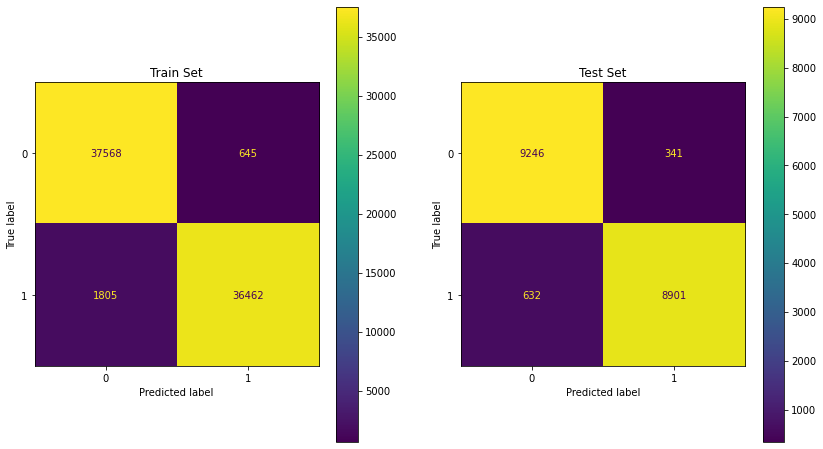

In [39]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=24)

model = DecisionTreeClassifier(max_depth=14)
model.fit(X_train, y_train)


y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")


plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

#### Features Importances

Text(0, 0.5, 'Feature')

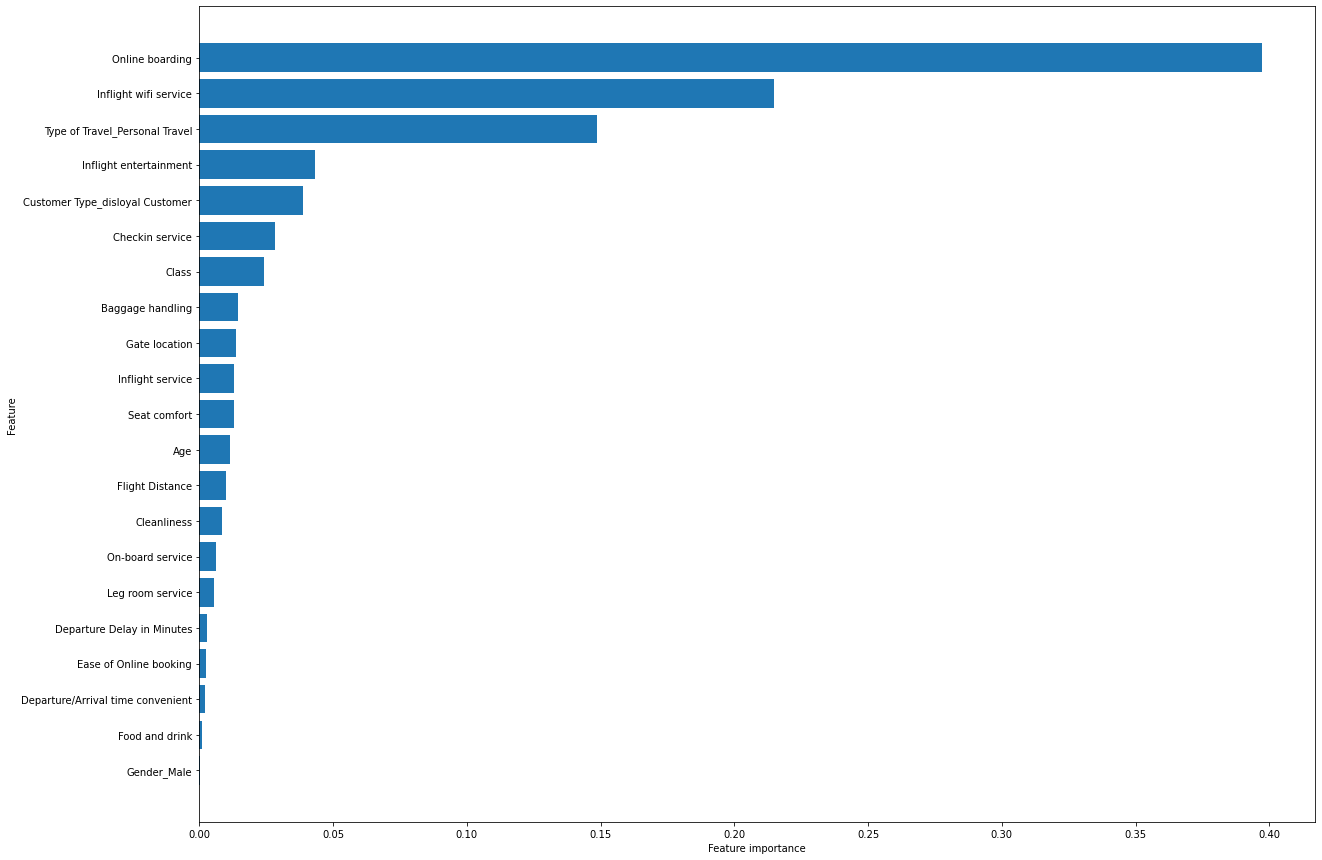

In [40]:
feature_importance = model.feature_importances_ 
sorted_idx = np.argsort(feature_importance) # Sort index on feature importance
fig = plt.figure(figsize=(20, 15)) # Set plot size (denoted in inches)
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_test.columns)[sorted_idx])

plt.xlabel("Feature importance") # Add x axis
plt.ylabel("Feature")

### Random Forest Classifier

In [41]:
X = data.drop(["satisfaction"], axis = 1)
y = data["satisfaction"]

,Error_metric,Train,Test
0,Accuracy,0.957021,0.953400
1,Precision,0.972751,0.966899
2,Recall,0.940599,0.937995


0.9496861924686192
0.9381276150627615


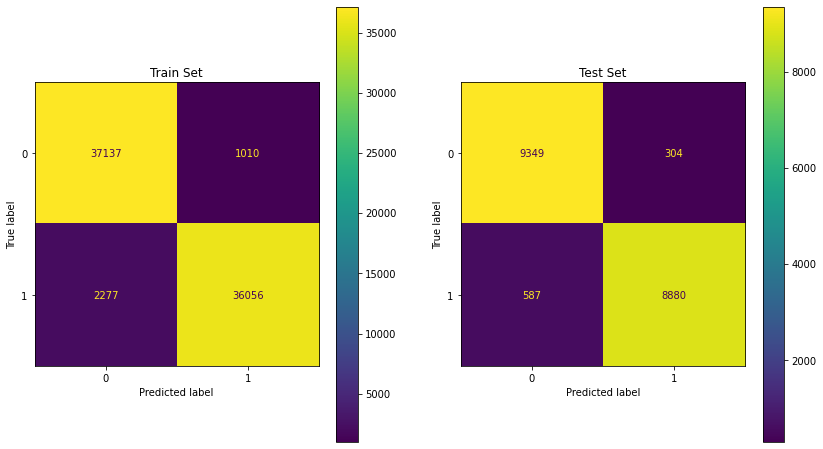

In [42]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

model4 = RandomForestClassifier(max_depth=26,min_samples_leaf=20,max_features=None,n_estimators=100,
                             bootstrap=True,oob_score=True, random_state=0)
model4.fit(X_train, y_train)

y_pred_train_dt = model4.predict(X_train)
y_pred_test_dt = model4.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


plot_confusion_matrix(model4,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")


plot_confusion_matrix(model4,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")
# print("Accuracy of train: ",model4.score(X_train, y_train))
# print("Accuracy of test: ",model4.score(X_test, y_test))

model4 = RandomForestClassifier(max_depth=26,min_samples_leaf=20,max_features=None,n_estimators=100,
                         bootstrap=True,oob_score=True, random_state=0)
cross_val_scores = cross_val_score(model4, X_train, y_train, cv=5)
cross_val_scores_test = cross_val_score(model4, X_test, y_test, cv=5)
print(np.mean(cross_val_scores))
print(np.mean(cross_val_scores_test))

### Feature Importances

In [43]:
model4.fit( X_train, y_train)

RandomForestClassifier(max_depth=26, max_features=None, min_samples_leaf=20,
                       oob_score=True, random_state=0)

In [44]:
len(X_train.columns)

21

In [45]:
feature_names = X_train.columns
feature_names = list(feature_names)

In [46]:
df = pd.DataFrame(list(zip(feature_names, model4.feature_importances_)))
df.columns = ['columns_name', 'score_feature_importance']
df.sort_values(by=['score_feature_importance'], ascending = False)

,columns_name,score_feature_importance
7,Online boarding,0.410473
2,Inflight wifi service,0.216998
19,Type of Travel_Personal Travel,0.147697
9,Inflight entertainment,0.045038
18,Customer Type_disloyal Customer,0.039744
13,Checkin service,0.030120
20,Class,0.024755
12,Baggage handling,0.012270
14,Inflight service,0.011577
0,Age,0.010636


#### Recursive feature elimination

In [47]:
from sklearn.feature_selection import RFE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

model4 = RandomForestClassifier(max_depth=26,min_samples_leaf=20,max_features=None,n_estimators=100,
                             bootstrap=True,oob_score=True, random_state=0)
selector = RFE(model4, n_features_to_select= 10, step = 1, verbose = 1) # Step is how many features to add or drop everytime
selector.fit(X_train, y_train)

kept_features = selector.get_support(indices = True) #returns an array of integers corresponding to nonremoved features
kept_features = list(X_train.iloc[:,kept_features].columns)

X_train = selector.transform(X_train)
X_test  = selector.transform(X_test)

X_train = pd.DataFrame(X_train, columns=kept_features)
X_test  = pd.DataFrame(X_test, columns=kept_features)

print("Final selected features: ")
display(X_train)


Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Final selected features: 


,Age,Inflight wifi service,Gate location,Online boarding,Inflight entertainment,Baggage handling,Checkin service,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class
0,15,2,1,2,3,3,5,0,1,1
1,47,5,5,5,5,3,1,0,0,1
2,23,1,1,1,1,5,5,1,0,1
3,45,3,3,4,4,4,3,0,0,3
4,55,3,3,4,5,5,5,0,0,3
...,...,...,...,...,...,...,...,...,...,...
76475,48,5,5,4,5,5,4,0,0,3
76476,66,1,3,0,2,3,1,1,0,1
76477,60,2,4,1,2,2,4,0,0,1
76478,33,3,3,3,3,5,4,0,1,1


In [114]:
X_train

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class
50875,30,448,3,3,3,3,4,4,4,4,1,1,4,1,2,4,0,1,0,0,3
119596,42,2114,4,4,4,4,2,4,4,3,3,4,3,4,3,3,0,1,0,0,3
6449,59,447,3,5,3,4,2,5,5,1,1,3,1,4,1,3,8,0,0,1,1
5863,43,533,4,5,5,5,5,2,5,4,4,4,4,4,4,2,15,0,0,0,1
81996,27,2773,1,0,0,4,2,0,2,2,3,3,3,2,3,2,7,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61404,40,813,5,4,4,4,5,5,5,5,2,4,1,1,5,5,0,0,0,0,1
17730,26,1303,3,3,3,4,1,3,1,1,1,4,3,1,4,1,0,0,1,0,1
28030,49,453,2,2,2,2,2,4,4,4,4,5,4,4,4,4,0,0,0,0,3
15725,56,1522,2,5,2,3,1,2,1,1,5,3,5,3,5,1,0,1,0,1,1


In [49]:
model4=RandomForestClassifier(max_depth=26,min_samples_leaf=20,max_features=None,n_estimators=100,
                             bootstrap=True,oob_score=True, random_state=0)
model4.fit(X_train, y_train)
print(f"{model4.__class__.__name__}: Train -> {model4.score(X_train, y_train)}, Test -> {model4.score(X_test, y_test)}")

cross_val_scores = cross_val_score(model4, X_train, y_train, cv=5)
cross_val_scores_test = cross_val_score(model4, X_test, y_test, cv=5)
print(np.mean(cross_val_scores))
print(np.mean(cross_val_scores_test))


RandomForestClassifier: Train -> 0.9514252092050209, Test -> 0.951255230125523
0.946848849372385
0.9353556485355649


**>>>>>>>>>>The result is worse than with all features<<<<<<<<<<<<**


### Random Forest Hyper Parameter Tunning

#### Grid Search

In [50]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100,500],
    'min_samples_split': [2, 4],
    'min_samples_leaf' : [1, 2],
    'max_features': ['sqrt']
    }
clf = RandomForestClassifier(random_state=100)

In [51]:
grid_search = GridSearchCV(clf, param_grid, cv=5,return_train_score=True,n_jobs=-1,)

In [52]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'max_features': ['sqrt'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [53]:
grid_search.best_params_ #To check the best set of parameters returned

{'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 500}

In [54]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.054934,0.020004,0.184536,0.010893,sqrt,1,2,50,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.945737,0.946260,0.942861,0.943253,0.945018,0.944626,0.001346,12,0.995015,0.995211,0.995211,0.995456,0.995375,0.995254,0.000152
1,6.100526,0.074417,0.361796,0.014935,sqrt,1,2,100,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.945868,0.947176,0.943449,0.944038,0.945737,0.945254,0.001345,11,0.995146,0.995375,0.995391,0.995620,0.995424,0.995391,0.000151
2,31.046053,0.519579,1.758718,0.015554,sqrt,1,2,500,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.945541,0.947568,0.943319,0.945149,0.946522,0.945620,0.001424,10,0.995146,0.995391,0.995407,0.995652,0.995440,0.995407,0.000161
3,2.979732,0.037003,0.176878,0.008372,sqrt,1,4,50,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.948679,0.950314,0.946914,0.948091,0.947045,0.948209,0.001241,9,0.986581,0.986810,0.986974,0.986990,0.987382,0.986948,0.000262
4,5.974649,0.011712,0.350960,0.005494,sqrt,1,4,100,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.948549,0.950445,0.947633,0.947829,0.947699,0.948431,0.001059,8,0.987350,0.987595,0.987660,0.987317,0.987464,0.987477,0.000134
5,30.380383,0.601653,1.741737,0.030866,sqrt,1,4,500,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.948941,0.950445,0.948222,0.948026,0.948549,0.948836,0.000862,7,0.987578,0.987660,0.987905,0.987905,0.987758,0.987762,0.000131
6,2.913202,0.047530,0.173644,0.008057,sqrt,2,2,50,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.950118,0.950641,0.947895,0.949202,0.949529,0.949477,0.000932,5,0.976889,0.977265,0.977020,0.977233,0.976726,0.977027,0.000204
7,6.090033,0.506627,0.347748,0.013304,sqrt,2,2,100,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.949725,0.951425,0.948679,0.949660,0.949202,0.949738,0.000923,3,0.977347,0.977380,0.977396,0.977707,0.976775,0.977321,0.000302
8,29.234166,0.139293,1.654475,0.031694,sqrt,2,2,500,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.949660,0.951948,0.948418,0.950837,0.950379,0.950248,0.001179,1,0.977723,0.977494,0.977756,0.977756,0.977167,0.977579,0.000228
9,2.906597,0.026252,0.176084,0.006551,sqrt,2,4,50,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.950118,0.950641,0.947895,0.949202,0.949529,0.949477,0.000932,5,0.976889,0.977265,0.977020,0.977233,0.976726,0.977027,0.000204


In [55]:
clf = RandomForestClassifier(random_state=0, max_features='sqrt', 
                             min_samples_leaf=2, min_samples_split=2, n_estimators=500)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=5)
cross_val_scores_test = cross_val_score(clf, X_test, y_test, cv=5)
print(np.mean(cross_val_scores))
print(np.mean(cross_val_scores_test))

0.9504576359832637
0.9493723849372385


### Logistic Regression

In [56]:
X = data.drop(["satisfaction"], axis = 1)
y = data["satisfaction"]

,Error_metric,Train,Test
0,Accuracy,0.865821,0.870084
1,Precision,0.877248,0.877909
2,Recall,0.851433,0.856766


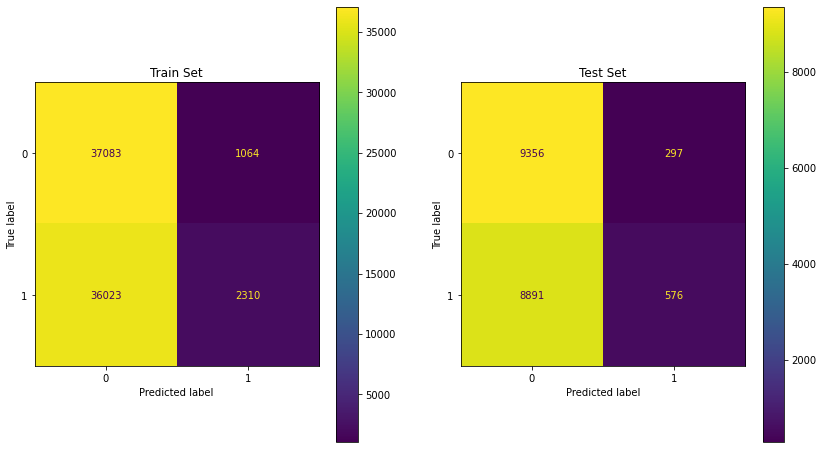

In [57]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.20,random_state=123)

model2 = LogisticRegression() 

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

model2.fit(X_train_mod, y_train)

y_pred_train_log = model2.predict(X_train_mod)
y_pred_test_log = model2.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

fig, ax = plt.subplots(1,2, figsize=(14,8))


plot_confusion_matrix(model2,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")


plot_confusion_matrix(model2,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

#### Features Importances

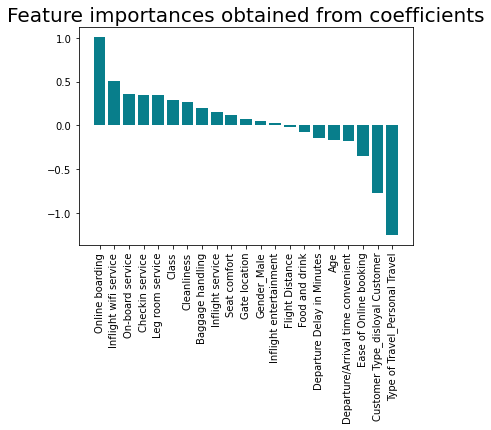

In [59]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model2.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

### Knn Classifier

In [60]:
X = data.drop(["satisfaction"], axis = 1)
y = data["satisfaction"]

In [61]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.20,random_state=123)

#### Scale the data

In [62]:
std_scaler=StandardScaler().fit(X_train)   ##. finding the parameters ( mean, variance from the training set )

X_train_scaled=std_scaler.transform(X_train)

In [63]:
X_train.shape

(76480, 21)

In [64]:
X_test_scaled=std_scaler.transform(X_test)

In [65]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-1.6424469  -0.89368191 -0.57784546 ... -0.46502291  1.56088972
  -1.11561845]
 [ 0.49767986  0.09015366  1.61241526 ... -0.46502291 -0.64066025
  -1.11561845]
 [-1.10741521 -0.7728228  -1.30793237 ...  2.15043171 -0.64066025
  -1.11561845]
 ...
 [ 1.36710636 -0.10279685 -0.57784546 ... -0.46502291 -0.64066025
  -1.11561845]
 [-0.4386256  -1.15342299  0.15224145 ... -0.46502291  1.56088972
  -1.11561845]
 [-1.37493106  0.50998005  0.88232836 ... -0.46502291 -0.64066025
   0.96366846]]
--------
[[ 0.09640609  0.04244612 -0.57784546 ... -0.46502291  1.56088972
   0.96366846]
 [ 0.29704298  1.29874477 -0.57784546 ... -0.46502291 -0.64066025
   0.96366846]
 [-1.3080521  -1.10041461 -0.57784546 ... -0.46502291 -0.64066025
   0.96366846]
 ...
 [ 0.49767986  1.55212484  0.88232836 ... -0.46502291 -0.64066025
   0.96366846]
 [ 1.36710636 -0.32225155 -0.57784546 ... -0.46502291  1.56088972
  -1.11561845]
 [-1.24117313  0.12407902  0.15224145 ...  2.15043171 -0.64066025
  -1.11561845]]


,Error_metric,Train,Test
0,Accuracy,0.944116,0.924738
1,Precision,0.965707,0.945604
2,Recall,0.921217,0.899757


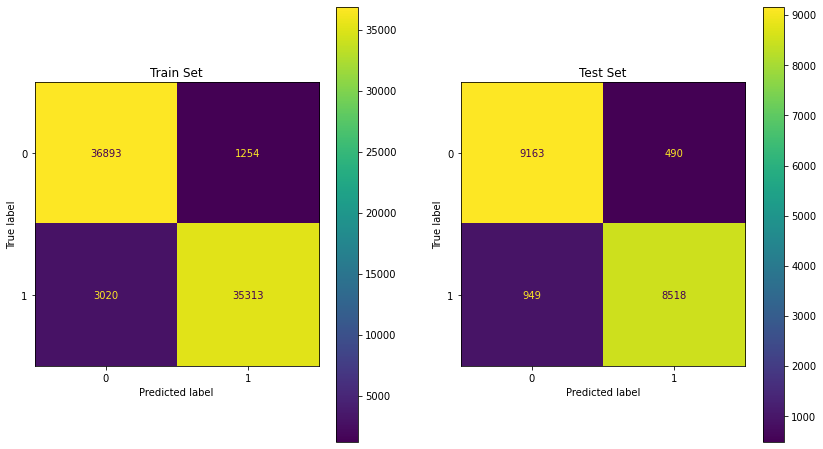

In [66]:
   
model3 = KNeighborsClassifier()
model3.fit(X_train_scaled, y_train)


y_pred_train = model3.predict(X_train_scaled)
y_pred_test = model3.predict(X_test_scaled)

performance = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})

display(performance)


fig, ax = plt.subplots(1,2, figsize=(14,8))


plot_confusion_matrix(model3,X_train_scaled,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model3,X_test_scaled,y_test,ax=ax[1], values_format = 'd')
ax[1].title.set_text("Test Set")

### Models Comparision

In [67]:
model_pipeline = [model,model4, model2, model3]
model_names = ['Decision Tree Classifier', 'Random forest Classifier','Logistic Regression', 'KNN Classifier']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'Decision Tree Classifier': 0.9475941422594142, 'Random forest Classifier': 0.9496861924686192, 'Logistic Regression': 0.8055831589958158, 'KNN Classifier': 0.7652850418410042}


## Upsampling (SMOTE)

In [68]:
smote = SMOTE()

In [69]:
data = total
X = data.drop(["satisfaction"], axis = 1)
y = data["satisfaction"]

In [70]:
y.value_counts()

0    61014
1    47800
Name: satisfaction, dtype: int64

In [71]:
X_sm, y_sm = smote.fit_resample(X, y)
y_sm.value_counts()

0    61014
1    61014
Name: satisfaction, dtype: int64

### Decision Tree Classifier

,Error_metric,Train,Test
0,Accuracy,0.964404,0.943661
1,Precision,0.973137,0.951024
2,Recall,0.955227,0.935158


0.9447255660389485
0.9288289306804696


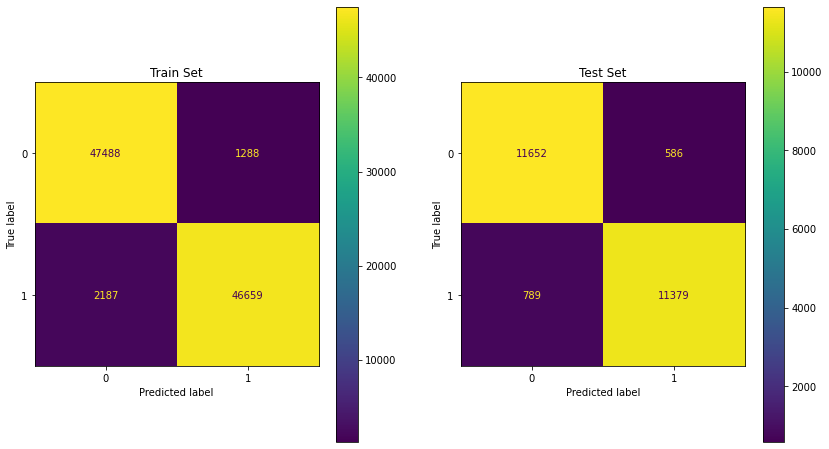

In [97]:
y = y_sm
X = X_sm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

model= DecisionTreeClassifier(max_depth=14)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")


plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

cross_val_scores = cross_val_score(model, X_train, y_train, cv=5)
cross_val_scores_test = cross_val_score(model, X_test, y_test, cv=5)
print(np.mean(cross_val_scores))
print(np.mean(cross_val_scores_test))

### Random forest Classifier

,Error_metric,Train,Test
0,Accuracy,0.960695,0.960338
1,Precision,0.973855,0.974862
2,Recall,0.946646,0.945700


0.9491200623494744
0.9348111350846585


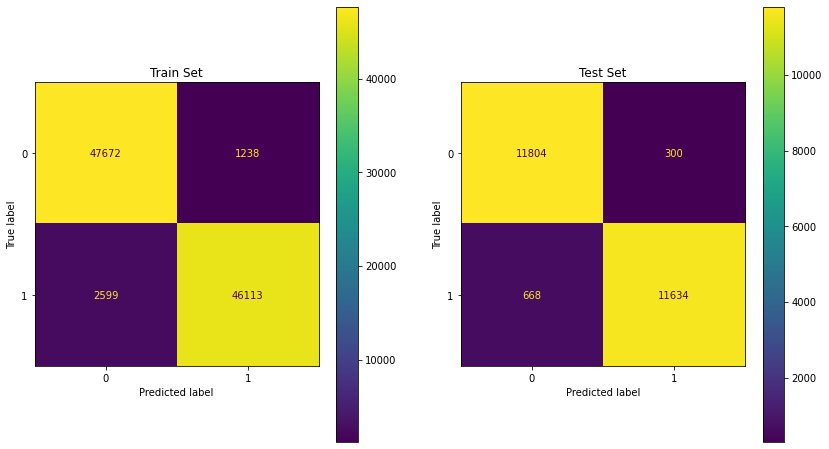

In [74]:
y = y_sm
X = X_sm


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

model4 = RandomForestClassifier(max_depth=26,min_samples_leaf=20,max_features=None,n_estimators=100,
                             bootstrap=True,oob_score=True, random_state=0)
model4.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")


plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

# print("Accuracy of train: ",model4.score(X_train, y_train))
# print("Accuracy of test: ",model4.score(X_test, y_test))

model4 = RandomForestClassifier(max_depth=26,min_samples_leaf=20,max_features=None,n_estimators=100,
                         bootstrap=True,oob_score=True, random_state=0)
cross_val_scores = cross_val_score(model4, X_train, y_train, cv=5)
cross_val_scores_test = cross_val_score(model4, X_test, y_test, cv=5)
print(np.mean(cross_val_scores))
print(np.mean(cross_val_scores_test))



### Random Forest Hyper Parameter Tunning

#### Grid Search

In [75]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100,500],
    'min_samples_split': [2, 4],
    'min_samples_leaf' : [1, 2],
    'max_features': ['sqrt']
    }
clf = RandomForestClassifier(random_state=100)

In [76]:
grid_search = GridSearchCV(clf, param_grid, cv=5,return_train_score=True,n_jobs=-1,)

In [77]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'max_features': ['sqrt'], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 500]},
             return_train_score=True)

In [78]:
grid_search.best_params_

{'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 500}

In [79]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.801437,0.160393,0.292121,0.009992,sqrt,1,2,50,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.957644,0.957644,0.956464,0.957027,0.956054,0.956967,0.000634,8,0.999962,0.999974,1.000000,0.999987,0.999949,0.999974,0.000018
1,13.653032,0.570164,0.606351,0.014387,sqrt,1,2,100,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.958412,0.958924,0.957693,0.957642,0.957181,0.957971,0.000619,4,1.000000,1.000000,0.999987,1.000000,1.000000,0.999997,0.000005
2,67.908922,0.713189,2.916291,0.054101,sqrt,1,2,500,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.959437,0.959693,0.959076,0.957488,0.956925,0.958524,0.001108,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,6.623954,0.053471,0.288142,0.021047,sqrt,1,4,50,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.958617,0.957337,0.957437,0.956771,0.956208,0.957274,0.000803,5,0.997132,0.997106,0.997567,0.997542,0.997145,0.997298,0.000210
4,13.182002,0.132441,0.567371,0.023408,sqrt,1,4,100,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.958873,0.958566,0.958308,0.957539,0.957181,0.958093,0.000635,3,0.997810,0.997708,0.997900,0.997887,0.997682,0.997798,0.000089
5,66.732137,1.224087,2.846927,0.017033,sqrt,1,4,500,"{'max_features': 'sqrt', 'min_samples_leaf': 1...",0.959027,0.958873,0.958769,0.957796,0.958103,0.958513,0.000478,2,0.998079,0.997964,0.998015,0.998131,0.997836,0.998005,0.000102
6,6.591211,0.026266,0.294622,0.015041,sqrt,2,2,50,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.956825,0.956466,0.957232,0.955235,0.956413,0.956434,0.000668,11,0.992240,0.991613,0.991882,0.991882,0.991767,0.991877,0.000207
7,13.394846,0.554106,0.570459,0.026679,sqrt,2,2,100,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.957746,0.956466,0.957591,0.956566,0.955747,0.956823,0.000747,9,0.992932,0.992548,0.992868,0.992599,0.992676,0.992724,0.000150
8,65.853267,1.140737,2.828207,0.043444,sqrt,2,2,500,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.958156,0.957029,0.958205,0.956361,0.956003,0.957151,0.000903,6,0.993611,0.993137,0.993457,0.993431,0.993278,0.993383,0.000162
9,6.970531,0.563119,0.290083,0.007690,sqrt,2,4,50,"{'max_features': 'sqrt', 'min_samples_leaf': 2...",0.956825,0.956466,0.957232,0.955235,0.956413,0.956434,0.000668,11,0.992240,0.991613,0.991882,0.991882,0.991767,0.991877,0.000207


,Error_metric,Train,Test
0,Accuracy,1.0,0.958699
1,Precision,1.0,0.969176
2,Recall,1.0,0.948220


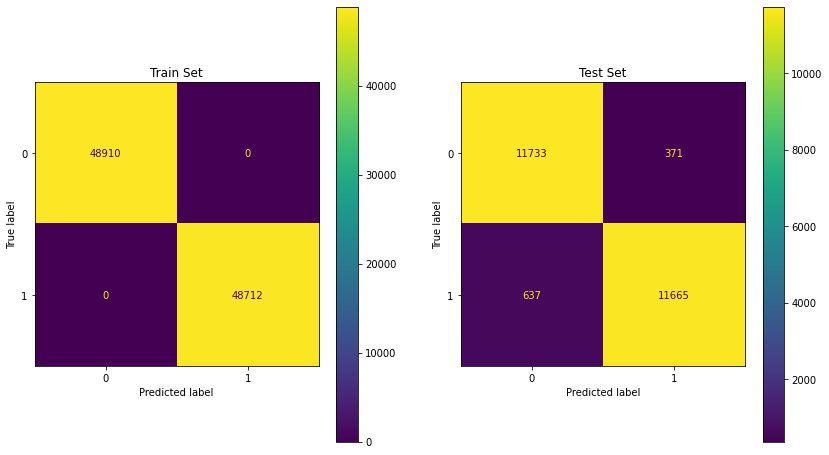

In [80]:
y = y_sm
X = X_sm


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

clf = RandomForestClassifier(random_state=0, max_features='sqrt', 
                             min_samples_leaf=1, min_samples_split=2, n_estimators=500)

clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


plot_confusion_matrix(clf,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")


plot_confusion_matrix(clf,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [81]:
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=5)
cross_val_scores_test = cross_val_score(clf, X_test, y_test, cv=5)
print(np.mean(cross_val_scores))
print(np.mean(cross_val_scores_test))

0.9584314836514946
0.9489059946262213


#### Feature Importances

In [82]:
df = pd.DataFrame(list(zip(feature_names, clf.feature_importances_)))
df.columns = ['columns_name', 'score_feature_importance']
df.sort_values(by=['score_feature_importance'], ascending = False)

,columns_name,score_feature_importance
7,Online boarding,0.169704
2,Inflight wifi service,0.142696
19,Type of Travel_Personal Travel,0.113115
20,Class,0.089910
9,Inflight entertainment,0.056122
18,Customer Type_disloyal Customer,0.042200
8,Seat comfort,0.041516
4,Ease of Online booking,0.040817
1,Flight Distance,0.040137
0,Age,0.037814


**>>>>>>>>>>>> With Random Forest Hyper Parameter Tunning we have the best test accuracy <<<<<<<<<<**

## Prediction Model for random people with Random Forest Hyper Parameter Tunning

In [130]:
  dic = {
      "Age": [23, 29, 27],
      "Flight Distance": [655.8, 8910,2190.8],
      "Inflight wifi service":[0,5,3],
      "Departure/Arrival time convenient":[1,4,2],
      "Ease of Online booking":[4,4,2],
      "Gate location":[1,2,3],
      "Food and drink":[0,3,1],
      "Online boarding":[4,4,1],
      "Seat comfort":[2,1,3],
      "Inflight entertainment":[3,1,1],
      "On-board service": [2,4,0],
      "Leg room service":[2,5,1],
      "Baggage handling":[2,5,1],
      "Checkin service":[2,4,0],
      "Inflight service":[2,5,3],
      "Cleanliness":[0,3,0],
      "Departure Delay in Minutes":[30,180,0],
      "Gender_Male":[0,1,0],
      "Customer Type_disloyal Customer":[1,1,1],
      "Type of Travel_Personal Travel":[0,1,0],
      "Class":[2,1,3]
      }

In [131]:
dic

{'Age': [23, 29, 27],
 'Flight Distance': [655.8, 8910, 2190.8],
 'Inflight wifi service': [0, 5, 3],
 'Departure/Arrival time convenient': [1, 4, 2],
 'Ease of Online booking': [4, 4, 2],
 'Gate location': [1, 2, 3],
 'Food and drink': [0, 3, 1],
 'Online boarding': [4, 4, 1],
 'Seat comfort': [2, 1, 3],
 'Inflight entertainment': [3, 1, 1],
 'On-board service': [2, 4, 0],
 'Leg room service': [2, 5, 1],
 'Baggage handling': [2, 5, 1],
 'Checkin service': [2, 4, 0],
 'Inflight service': [2, 5, 3],
 'Cleanliness': [0, 3, 0],
 'Departure Delay in Minutes': [30, 180, 0],
 'Gender_Male': [0, 1, 0],
 'Customer Type_disloyal Customer': [1, 1, 1],
 'Type of Travel_Personal Travel': [0, 1, 0],
 'Class': [2, 1, 3]}

In [132]:
data2 = pd.DataFrame.from_dict(dic, orient='index').T

In [133]:
data2

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class
0,23.0,655.8,0.0,1.0,4.0,1.0,0.0,4.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,0.0,30.0,0.0,1.0,0.0,2.0
1,29.0,8910.0,5.0,4.0,4.0,2.0,3.0,4.0,1.0,1.0,4.0,5.0,5.0,4.0,5.0,3.0,180.0,1.0,1.0,1.0,1.0
2,27.0,2190.8,3.0,2.0,2.0,3.0,1.0,1.0,3.0,1.0,0.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,3.0


In [134]:
clf.fit(X_train, y_train)
clf.predict(data2)

array([0, 1, 0])

### Logistic Regression

,Error_metric,Train,Test
0,Accuracy,0.869271,0.870647
1,Precision,0.877436,0.882029
2,Recall,0.857838,0.858153


0.8086803936243413
0.8110711039075763


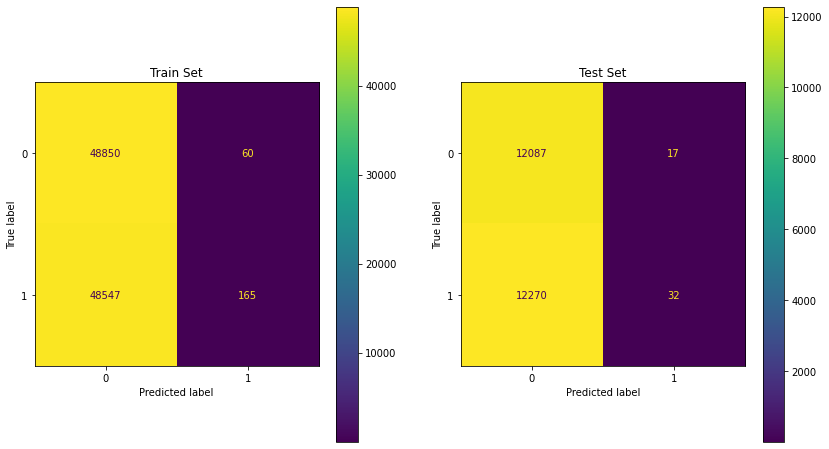

In [98]:
y = y_sm
X = X_sm

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.20,random_state=123)

model2 = LogisticRegression() 

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

model2.fit(X_train_mod, y_train)

y_pred_train_log = model2.predict(X_train_mod)
y_pred_test_log = model2.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

fig, ax = plt.subplots(1,2, figsize=(14,8))


plot_confusion_matrix(model2,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")


plot_confusion_matrix(model2,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

cross_val_scores = cross_val_score(model2, X_train, y_train, cv=5)
cross_val_scores_test = cross_val_score(model2, X_test, y_test, cv=5)
print(np.mean(cross_val_scores))
print(np.mean(cross_val_scores_test))


### Knn Classifier

In [89]:
y = y_sm
X = X_sm

In [90]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=.20,random_state=123)

#### Scale the data

In [91]:
std_scaler=StandardScaler().fit(X_train)  

X_train_scaled=std_scaler.transform(X_train)

In [92]:
X_train.shape

(97622, 21)

In [93]:
X_test_scaled=std_scaler.transform(X_test)

In [94]:
print(X_train_scaled)
print("--------")
print(X_test_scaled)

[[-0.64066237 -0.75942354  0.18370948 ... -0.45526553 -0.6311859
   0.97818365]
 [ 0.16317984  1.00687435  0.92607585 ... -0.45526553 -0.6311859
   0.97818365]
 [ 1.3019563  -0.76048374  0.18370948 ... -0.45526553  1.58431928
  -1.10853118]
 ...
 [ 0.63208779 -0.75412253 -0.55865689 ... -0.45526553 -0.6311859
   0.97818365]
 [ 1.10099574  0.37923428 -0.55865689 ... -0.45526553  1.58431928
  -1.10853118]
 [ 0.56510094 -0.58555028  0.92607585 ... -0.45526553 -0.6311859
  -1.10853118]]
--------
[[-0.03778072  0.7630277  -1.30102327 ... -0.45526553 -0.6311859
   0.97818365]
 [ 0.16317984 -0.91209275  0.18370948 ... -0.45526553  1.58431928
  -1.10853118]
 [-2.11437308  0.32516394 -0.55865689 ...  2.19652036 -0.6311859
   0.97818365]
 ...
 [ 1.16798259  0.38983631 -1.30102327 ... -0.45526553 -0.6311859
   0.97818365]
 [ 0.56510094 -0.27279045  0.92607585 ... -0.45526553 -0.6311859
  -0.06517377]
 [-0.17175442 -1.04991911  1.66844223 ... -0.45526553 -0.6311859
  -0.06517377]]


,Error_metric,Train,Test
0,Accuracy,0.947030,0.921945
1,Precision,0.965092,0.946491
2,Recall,0.927390,0.895789


0.7791378548244637
0.7124069108611248


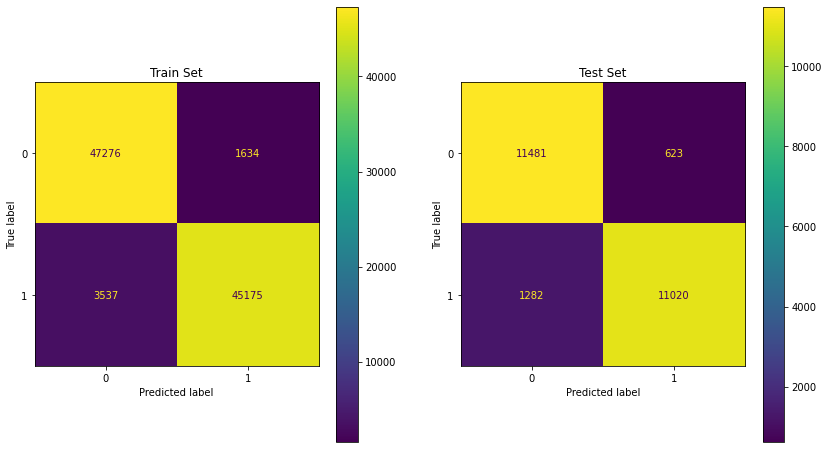

In [99]:
model3 = KNeighborsClassifier()
model3.fit(X_train_scaled, y_train)


y_pred_train = model3.predict(X_train_scaled)
y_pred_test = model3.predict(X_test_scaled)

performance = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})

display(performance)


fig, ax = plt.subplots(1,2, figsize=(14,8))


plot_confusion_matrix(model3,X_train_scaled,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model3,X_test_scaled,y_test,ax=ax[1], values_format = 'd')
ax[1].title.set_text("Test Set")


cross_val_scores = cross_val_score(model3, X_train, y_train, cv=5)
cross_val_scores_test = cross_val_score(model3, X_test, y_test, cv=5)
print(np.mean(cross_val_scores))
print(np.mean(cross_val_scores_test))

### Models Comparision

In [96]:
model_pipeline = [model,model4, model2, model3]
model_names = ['Decision Tree Classifier', 'Random forest Classifier','Logistic Regression', 'KNN Classifier']
scores = {}
i=0
for model in model_pipeline:
    mean_score = np.mean(cross_val_score(model, X_train, y_train, cv=5))
    scores[model_names[i]] = mean_score
    i = i+1
print(scores)

{'Decision Tree Classifier': 0.9443055822034327, 'Random forest Classifier': 0.9491200623494744, 'Logistic Regression': 0.8086803936243413, 'KNN Classifier': 0.7791378548244637}
